# Accident Risk Prediction
Notebook pour prédire le risque d'accident et expliquer les résultats avec SHAP.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import shap
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\yacin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Lecture des fichiers CSV

In [2]:
train_df = pd.read_csv("D:/Accident_Risk_Prediction/dataset/train.csv")
test_df = pd.read_csv("D:/Accident_Risk_Prediction/dataset/test.csv")
train_df.head()

,road_type,traffic_density,avg_speed,weather_condition,num_lanes,road_surface,lighting,accident_risk
0,Rural,139.101364,114.102708,Clear,3,Good,Daylight,0.145483
1,Highway,247.109808,76.963010,Foggy,3,Good,Daylight,0.463378
2,Rural,233.934693,70.137193,Rainy,3,Fair,Daylight,0.602206
3,Rural,243.013532,80.538561,Clear,5,Fair,Night,0.630290
4,Highway,313.502582,81.630765,Foggy,4,Good,Daylight,0.643345


## Gestion des valeurs manquantes

In [3]:
# Gestion des NaN dans la cible (train uniquement)
print("Valeurs manquantes dans train_df :")
print(train_df.isna().sum())
train_df['accident_risk'].fillna(train_df['accident_risk'].median(), inplace=True)

# Supprimer les NaN dans les features (train et test)
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

Valeurs manquantes dans train_df :
road_type               0
traffic_density         0
avg_speed               0
weather_condition       0
num_lanes               0
road_surface            0
lighting                0
accident_risk        3283
dtype: int64


## Encodage des variables catégorielles

In [4]:
categorical_cols = ["road_type", "weather_condition", "road_surface", "lighting"]
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

## Assurer que les colonnes test correspondent aux colonnes train

In [5]:
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

## Séparation features et target

In [6]:
X_train = train_df.drop("accident_risk", axis=1)
y_train = train_df["accident_risk"]
X_test = test_df.drop("accident_risk", axis=1)
y_test = test_df["accident_risk"] if 'accident_risk' in test_df.columns else np.zeros(len(test_df))
print("NaN dans X_train :", np.any(np.isnan(X_train)))
print("NaN dans y_train :", np.any(np.isnan(y_train)))
print("NaN dans X_test :", np.any(np.isnan(X_test)))
print("NaN dans y_test :", np.any(np.isnan(y_test)))

NaN dans X_train : False
NaN dans y_train : False
NaN dans X_test : False
NaN dans y_test : False


## Standardisation

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, "Scaler_Accident.pkl")

['Scaler_Accident.pkl']

## Entraînement du modèle Random Forest

In [8]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Prédiction et évaluation

In [ ]:
y_pred = rf_model.predict(X_test)
print("R2 score :", r2_score(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 score : 0.0
RMSE : 0.5835077101600574


## Explicabilité avec SHAP

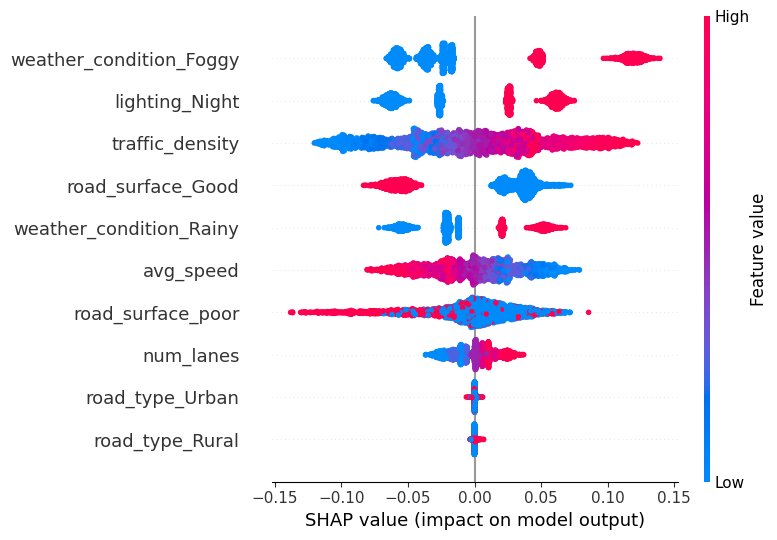

In [11]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=train_df.drop("accident_risk", axis=1).columns)

## Explication individuelle pour un échantillon

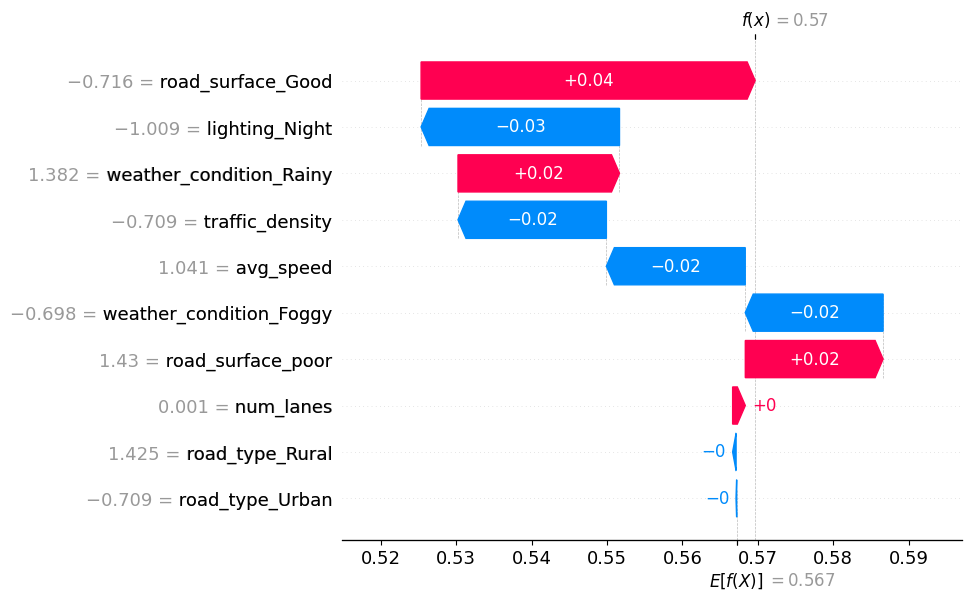

In [16]:
shap.plots.waterfall(shap_values_expl[0])